In [1]:
from tqdm import tqdm
import time

import sklearn.preprocessing as pre
from scipy.spatial.distance import cosine

import numpy as np

### Check scaling effect on embeddings

In [2]:
def closest_to(w, idx, dist_func):
    x = np.array(list(map(lambda u: dist_func(w[idx], u), w)))
    a = np.argsort(x)
    return a, x[a]

In [3]:
W = np.float64(np.random.rand(100, 2))

print(W.dtype)

W.min(), W.max(), W.mean(), W.std()

float64


(0.003444885840101941,
 0.9997482719323851,
 0.5111316601522121,
 0.30346421889455344)

In [4]:
s = pre.StandardScaler()

# sW = np.float64(s.fit_transform(W))

sW = W / W.std() - W.mean() / W.std()

print(sW.dtype)

sW.min(), sW.max(), sW.mean(), sW.std()

float64


(-1.6729707909601006, 1.6101292388278423, -9.103828801926283e-17, 1.0)

In [5]:
d = 4
b = np.ones(d)
np.linalg.norm(b) == np.sqrt(d)

True

In [6]:
i = 6
m_cos = lambda x, y: 1 - np.dot(x, y) / np.linalg.norm(x) / np.linalg.norm(y)
func = m_cos

a1, s1 = closest_to(W, i, func)
a1_m, s1_m = closest_to(W, i, cosine)

a2, s2 = closest_to(sW, i, func)
a2_m, s2_m = closest_to(sW, i, cosine)

a1_m[:10], a2_m[:10]

# with np.printoptions(precision=64, suppress=True):
#         print(s1_m, s2_m)

(array([ 6, 34, 82, 66, 80, 79, 88, 96, 56, 98]),
 array([ 6, 86, 35, 39, 45, 48, 79, 24, 94, 84]))

[0 4 1 2 3]
[0 1 2 4 3]


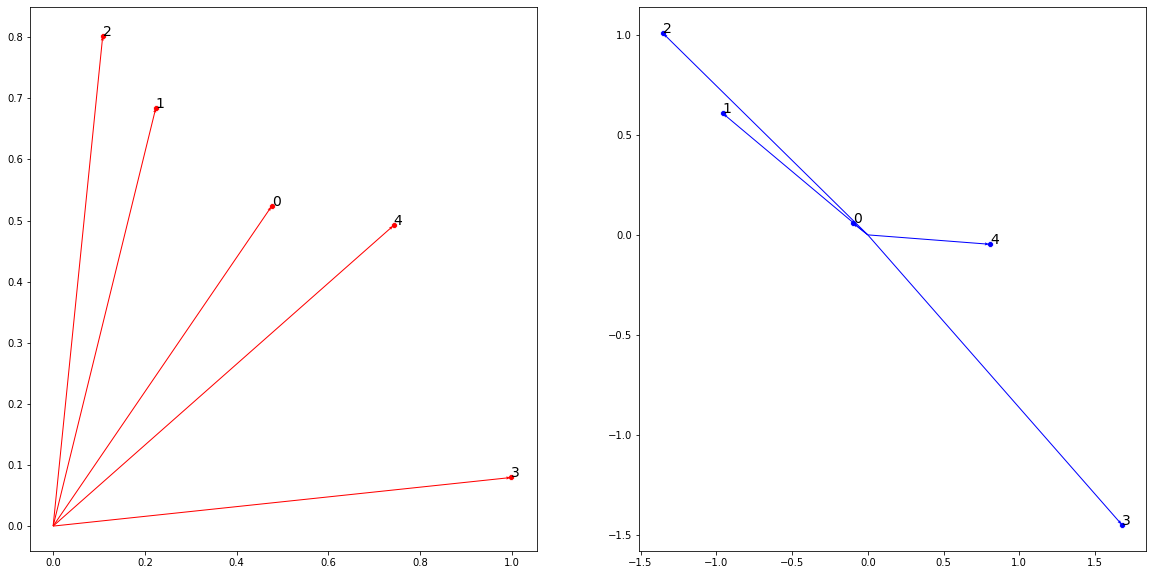

In [11]:
n = 5
w = W[:n]
sw = sW[:n]

i = 0
f = cosine
x, _ = closest_to(w, i, f)
y, _ = closest_to(sw, i, f)

print(x)
print(y)

origin = [0], [0]

fig = plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
ax = sns.scatterplot(w[:, 0], w[:, 1], color='r')
for i in range(n):
    ax.text(w[i][0], w[i][1], str(i), fontsize=14, horizontalalignment='left')
plt.quiver(*origin, w[:, 0], w[:,1], color='r', angles='xy', scale_units='xy', scale=1, width=0.002)


ax = plt.subplot(1, 2, 2)
ax = sns.scatterplot(sw[:, 0], sw[:, 1], color='b')
for i in range(n):
    ax.text(sw[i][0], sw[i][1], str(i), fontsize=14, horizontalalignment='left')
plt.quiver(*origin, sw[:, 0], sw[:,1], color='b', angles='xy', scale_units='xy', scale=1, width=0.002)
    
plt.show()